In [4]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
import seaborn as sns
from sklearn import feature_extraction
import mpld3
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
unique_immigration_df = pd.read_csv("./data/unique_immigration_104_107.csv")
df_with_cluster = pd.read_csv("./final_frame.csv")

In [8]:
unique_immigration_df.head(1)

,Nay (Democrats),Nay (Others),Nay (Republicans),Not Voting (Democrats),Not Voting (Others),Not Voting (Republicans),Present (Democrats),Present (Others),Present (Republicans),Yea (Democrats),...,bill_sponsor_name,bill_title,chamber,date,isAmendment,list_of_voters_obj,question,result,top_subject,year
0,45,0,0,0,0,0,0,0,0,1,...,"Helms, Jesse",s908,senate,1995-08-01T14:15:00-04:00,False,"[{'vote': 'Nay', 'party': 'D', 'state': 'HI', ...",On the Cloture Motion S. 908,"Cloture Motion Rejected (55-45, 3/5 majority r...",International affairs,1995


In [9]:
df_with_cluster.head(1)

,title,number,cluster,year,words_in_cluster
0,On the Cloture Motion S. 908,s908,4,1995,"['secretary', 'u.s.', 'united', 'foreign', 'un..."


## Percentage of Bills Passed

In [10]:
counter = 0
for i in range(len(unique_immigration_df["result"])):
    if unique_immigration_df["result"][i] == "Passed":
        counter+=1

print (float(counter)/len(unique_immigration_df["result"]))*100, "% of the bills passed."

71.0526315789 % of the bills passed.


## Year Distribution of Bills (1995-2005)

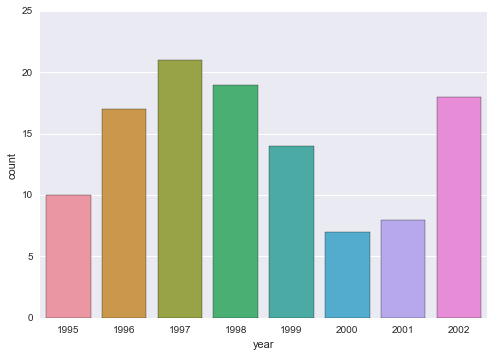

In [11]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="year", data=unique_immigration_df)

In [12]:
# Create a csv with the frequency of bills in years 1995-2005
year_distribution_obj = {}

for year in unique_immigration_df["year"]:
    if year not in year_distribution_obj:
        year_distribution_obj[year] = 1
    else:
        year_distribution_obj[year]+=1
        
res_dict = {}
res_dict["Year"] = []
res_dict["Number"] = []

for year in year_distribution_obj:
    res_dict["Number"].append(year_distribution_obj[year])
    res_dict["Year"].append(year)
    
year_dist_df = pd.DataFrame(res_dict)
year_dist_df.to_csv('year_bill_distribution.csv', index=False)

## Cluster Distribution of Bills (1995-2005)

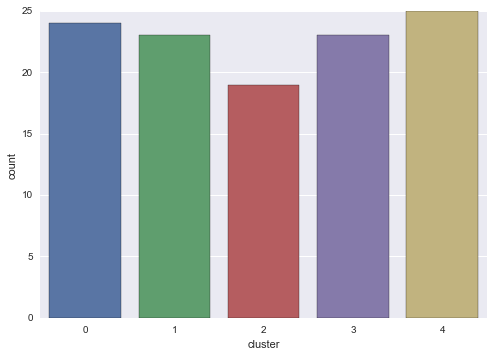

In [13]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="cluster", data=df_with_cluster)

In [31]:
# Cluster distribution on year
cluster_distribution_obj = {}

for cluster in df_with_cluster["cluster"]:
    if cluster not in cluster_distribution_obj:
        cluster_distribution_obj[cluster] = 1
    else:
        cluster_distribution_obj[cluster]+=1
        
res_dict = {}
res_dict["Cluster"] = []
res_dict["Number"] = []

for cluster in cluster_distribution_obj:
    res_dict["Number"].append(cluster_distribution_obj[cluster])
    res_dict["Cluster"].append(cluster)
    
year_dist_df = pd.DataFrame(res_dict)
year_dist_df.to_csv('cluster_bill_distribution.csv', index=False)

## Distribution of Bills based on top subject (1995-2005)

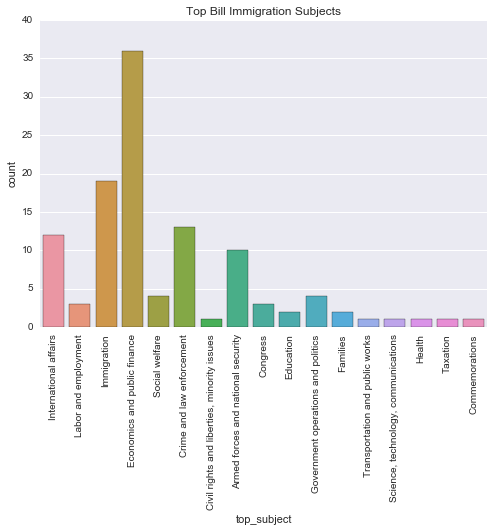

In [90]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="top_subject", data=unique_immigration_df)
plt.xticks(rotation=90) 
plt.title("Top Bill Immigration Subjects")
plt.savefig("immigration_subject.png")

In [69]:
# Cluster distribution on year
top_subject_distribution_obj = {}

for subject in unique_immigration_df["top_subject"]:
    if subject not in top_subject_distribution_obj:
        top_subject_distribution_obj[subject] = 1
    else:
        top_subject_distribution_obj[subject]+=1
        
res_dict = {}
res_dict["Top-Subject"] = []
res_dict["Number"] = []

for subject in top_subject_distribution_obj:
    res_dict["Number"].append(top_subject_distribution_obj[subject])
    res_dict["Top-Subject"].append(subject)
    
top_subject_dist_df = pd.DataFrame(res_dict)
top_subject_dist_df.to_csv('subject_bill_distribution.csv', index=False)

## Party Analysis - Distribution of Votes across different bills

##### Create a csv with the bill titles, clusters and their respective percentage success on the democratic and republican party

In [56]:
def get_vote_columns(df):
    lst = []
    counter = 0
    for i in df:
        counter+=1
        lst.append(i)
        if (i=="Yea (Republicans)"):
            return lst

In [57]:
no_dem = []
no_rep = []
yes_dem = []
yes_rep = []
bills = []
clusters = []
years = []
for index, row in unique_immigration_df.iterrows():
    bills.append(row[15])
    row_total_votes=0
    for i in range(12):
        row_total_votes += row[i]
    dem_no_perc = float(row[0])/row_total_votes
    rep_no_perc = float(row[2])/row_total_votes
    dem_yes_perc = float(row[9])/row_total_votes
    rep_yes_perc = float(row[11])/row_total_votes
    no_dem.append(dem_no_perc)
    no_rep.append(rep_no_perc)
    yes_dem.append(dem_yes_perc)
    yes_rep.append(rep_yes_perc)
    
for index, row in df_with_cluster.iterrows():  
    clusters.append(row[2])
    years.append(row[3])

In [58]:
cluster_votes_dict= {}
cluster_votes_dict["no_dem"] = no_dem
cluster_votes_dict["no_rep"] = no_rep
cluster_votes_dict["yes_dem"] = yes_dem
cluster_votes_dict["yes_rep"] = yes_rep
cluster_votes_dict["bills"] = bills
cluster_votes_dict["clusters"] = clusters
cluster_votes_dict["year"] = years

year_dist_df = pd.DataFrame(cluster_votes_dict)
year_dist_df.to_csv('vote_cluster_distribution.csv', index=False)

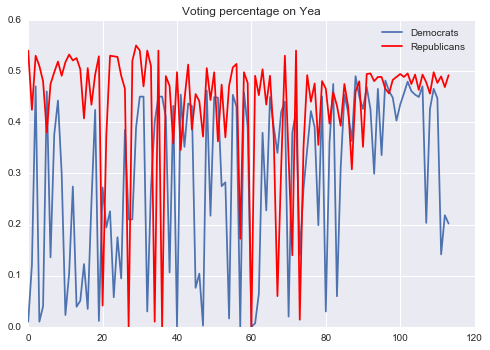

In [83]:
# Percentage of "Yea" votes on immigration bills in period 1995-2005
file_new = pd.read_csv("vote_cluster_distribution.csv", index_col=None)
plt.plot(file_new["yes_dem"])
plt.plot(file_new["yes_rep"], 'r')
plt.title("Voting percentage on Yea")
plt.legend(['Democrats', 'Republicans'])

#Showing what we plotted
plt.show()

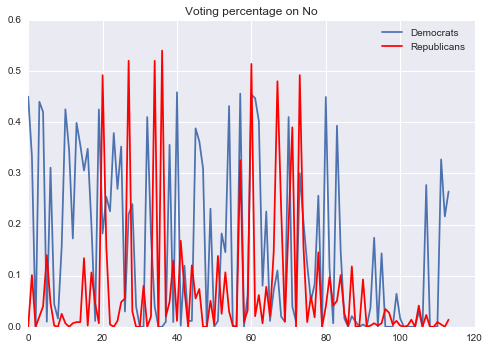

In [85]:
# Percentage of "No" votes on immigration bills in period 1995-2005
file_new = pd.read_csv("vote_cluster_distribution.csv", index_col=None)
plt.plot(file_new["no_dem"])
plt.plot(file_new["no_rep"], 'r')
plt.title("Voting percentage on No")
plt.legend(['Democrats', 'Republicans'])

#Showing what we plotted
plt.show()

## Specific Topic Analysis : Economics and Public Finance

Pick the topic for immigration with relation to Economics and Public Finance and look into the voting percentages of the different parties on the matter. An appropriate csv was created for this purpose.

In [86]:
# Cluster distribution on year
economics_and_finance_topic = {}
no_dem_econ = []
no_rep_econ = []
yes_dem_econ = []
yes_rep_econ = []
bills_econ = []
years_econ = []

for index, row in unique_immigration_df.iterrows():
    if row[22] == "Economics and public finance":
        bills_econ.append(row[15])
        row_total_votes=0
        for i in range(12):
            row_total_votes += row[i]
        dem_no_perc = float(row[0])/row_total_votes
        rep_no_perc = float(row[2])/row_total_votes
        dem_yes_perc = float(row[9])/row_total_votes
        rep_yes_perc = float(row[11])/row_total_votes
        no_dem_econ.append(dem_no_perc)
        no_rep_econ.append(rep_no_perc)
        yes_dem_econ.append(dem_yes_perc)
        yes_rep_econ.append(rep_yes_perc)
        years_econ.append(row[23])
    
cluster_votes_dict= {}
cluster_votes_dict["no_dem"] = no_dem_econ
cluster_votes_dict["no_rep"] = no_rep_econ
cluster_votes_dict["yes_dem"] = yes_dem_econ
cluster_votes_dict["yes_rep"] = yes_rep_econ
cluster_votes_dict["bills"] = bills_econ
cluster_votes_dict["year"] = years_econ

year_dist_df = pd.DataFrame(cluster_votes_dict)
year_dist_df.to_csv('vote_econ_topic_distribution.csv', index=False)

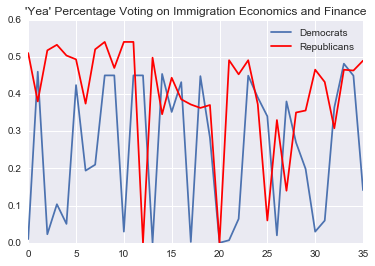

In [9]:
# Percentage of "Yea" votes on immigration bills in period 1995-2005
file_new = pd.read_csv("vote_econ_topic_distribution.csv", index_col=None)
plt.plot(file_new["yes_dem"])
plt.plot(file_new["yes_rep"], 'r')
plt.title("'Yea' Percentage Voting on Immigration Economics and Finance")
plt.legend(['Democrats', 'Republicans'])
plt.savefig("yea_econ.png")

#Showing what we plotted
plt.show()

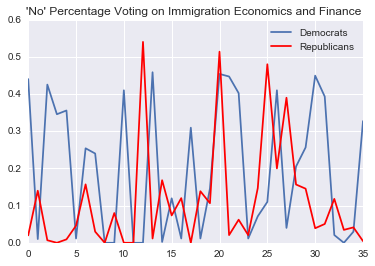

In [8]:
# Percentage of "No" votes on immigration bills in period 1995-2005
file_new = pd.read_csv("vote_econ_topic_distribution.csv", index_col=None)
plt.plot(file_new["no_dem"])
plt.plot(file_new["no_rep"], 'r')
plt.title("'No' Percentage Voting on Immigration Economics and Finance ")
plt.legend(['Democrats', 'Republicans'])
plt.savefig("no_econ.png")
#Showing what we plotted
plt.show()